In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
from IPython.display import display

ModuleNotFoundError: No module named 'sklearn'

In [3]:
!wget https://raw.githubusercontent.com/LCD-UNSAM/iaa2023c1/main/datasets/IAA_Guia_2_data.csv

--2023-04-03 22:30:14--  https://raw.githubusercontent.com/LCD-UNSAM/iaa2023c1/main/datasets/IAA_Guia_2_data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11991 (12K) [text/plain]
Saving to: ‘IAA_Guia_2_data.csv.1’

IAA_Guia_2_data.csv 100%[===================>]  11.71K  --.-KB/s    in 0.001s  

2023-04-03 22:30:19 (8.30 MB/s) - ‘IAA_Guia_2_data.csv.1’ saved [11991/11991]



In [4]:
pip install sklearn 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
bicis = pd.read_csv('../guia2/IAA_Guia_2_data.csv', on_bad_lines='skip')
bicis.shape


FileNotFoundError: [Errno 2] No such file or directory: 'IAA_Guia_2_data.csv.1'

In [ ]:
bicis.shape

In [ ]:
bicis.columns

In [1]:
date = bicis['Date'].iloc[0]
pd.to_datetime(date).month

NameError: name 'bicis' is not defined

In [ ]:
def es_dia_semana(fecha):
    if pd.to_datetime(fecha).weekday() < 5: # 0 es lunes, 4 es viernes
        return 1
    else:
        return 0



In [ ]:
#@title Default title text

def es_mes_vacaciones(fecha):
    if pd.to_datetime(fecha).month == 0 or pd.to_datetime(fecha).month == 1:  # 0 es lunes, 4 es viernes
        return 1
    else:
        return 0

In [ ]:
# bicis['WeekDay'] = bicis['Date'].apply(es_dia_semana)
bicis['WeekDay'] = pd.to_datetime(bicis['Date']).dt.dayofweek
bicis['es_dia_semana'] = bicis['Date'].apply(es_dia_semana)




In [ ]:
bicis['Vacation_Month'] = bicis['Date'].apply(es_mes_vacaciones)
bicis['month'] = pd.to_datetime(bicis['Date']).dt.month

In [ ]:
# plt.matshow(bicis.corr())
# plt.show()
bicis


,Date,Viajes,PRCP,TMAX,TMIN,TAVG,WeekDay,es_dia_semana,Vacation_Month,month
0,2018-01-01,2079,0.0,NaN,17.5,22.2,0,1,1,1
1,2018-01-02,4077,0.0,NaN,18.6,25.4,1,1,1,1
2,2018-01-03,4852,0.0,33.0,16.9,26.1,2,1,1,1
3,2018-01-04,4543,0.0,NaN,22.2,29.2,3,1,1,1
4,2018-01-05,3365,0.0,36.7,NaN,24.8,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...
358,2018-12-26,4187,0.0,NaN,24.0,27.9,2,1,0,12
359,2018-12-27,4471,0.0,31.7,24.0,27.7,3,1,0,12
360,2018-12-28,4341,0.0,31.6,23.3,26.8,4,1,0,12
361,2018-12-29,2598,23.9,30.7,20.5,26.1,5,0,0,12


In [ ]:
corr = bicis.corr()
corr.style.background_gradient(cmap='coolwarm')

,Viajes,PRCP,TMAX,TMIN,TAVG,WeekDay,es_dia_semana,Vacation_Month,month
Viajes,1.000000,-0.129655,-0.441234,-0.438389,-0.419008,-0.295341,0.379486,-0.305034,0.413862
PRCP,-0.129655,1.000000,0.067029,0.077335,0.033808,0.121317,-0.094482,-0.076154,0.094619
TMAX,-0.441234,0.067029,1.000000,0.851540,0.914114,0.076693,-0.096638,0.412239,-0.314812
TMIN,-0.438389,0.077335,0.851540,1.000000,0.963139,-0.025308,0.015397,0.341244,-0.277625
TAVG,-0.419008,0.033808,0.914114,0.963139,1.000000,-0.023609,0.018314,0.366239,-0.258651
WeekDay,-0.295341,0.121317,0.076693,-0.025308,-0.023609,1.000000,-0.790845,-0.030888,0.022238
es_dia_semana,0.379486,-0.094482,-0.096638,0.015397,0.018314,-0.790845,1.000000,0.019219,-0.016937
Vacation_Month,-0.305034,-0.076154,0.412239,0.341244,0.366239,-0.030888,0.019219,1.000000,-0.488519
month,0.413862,0.094619,-0.314812,-0.277625,-0.258651,0.022238,-0.016937,-0.488519,1.000000


In [ ]:
x1 = bicis['TAVG']
x2 = bicis['month']
x3 = bicis['PRCP']
x4 = bicis['TMAX']
x5 = bicis['TMIN']
x6 = bicis['Vacation_Month']
x7 = pd.get_dummies(bicis['Date'])
x8 = bicis['WeekDay']
x9 = bicis['es_dia_semana']
y = bicis['Viajes']

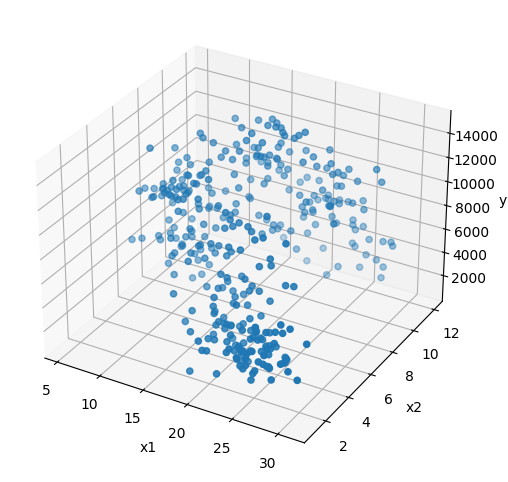

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

In [ ]:
# X = x7
# X = np.vstack((x1,x2)).T
X = np.vstack((x1,x2,x3,x6, x8,x9)).T
# print(X.shape)
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_model.score(X,y)

0.44300380172203646

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [ ]:
linear_model.score(X,y)

0.44300380172203646

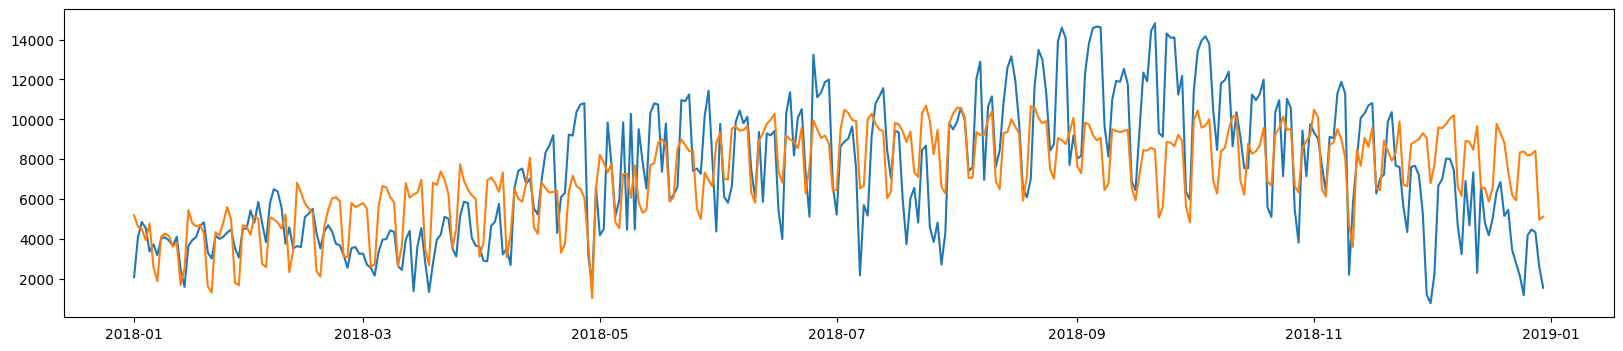

In [ ]:
bicis['Date'] = pd.to_datetime(bicis['Date'])
plt.figure(figsize=(20,4))
plt.plot(bicis.Date,bicis.Viajes)
plt.plot(bicis.Date,bicis.viajes_pred)

In [ ]:
bicis['viajes_pred'] = linear_model.predict(X)
bicis

,Date,Viajes,PRCP,TMAX,TMIN,TAVG,WeekDay,es_dia_semana,Vacation_Month,month,viajes_pred
0,2018-01-01,2079,0.0,NaN,17.5,22.2,0,1,1,1,5184.285308
1,2018-01-02,4077,0.0,NaN,18.6,25.4,1,1,1,1,4611.751106
2,2018-01-03,4852,0.0,33.0,16.9,26.1,2,1,1,1,4499.592844
3,2018-01-04,4543,0.0,NaN,22.2,29.2,3,1,1,1,3945.473680
4,2018-01-05,3365,0.0,36.7,NaN,24.8,4,1,1,1,4772.482334
...,...,...,...,...,...,...,...,...,...,...,...
358,2018-12-26,4187,0.0,NaN,24.0,27.9,2,1,0,12,8188.079584
359,2018-12-27,4471,0.0,31.7,24.0,27.7,3,1,0,12,8241.656660
360,2018-12-28,4341,0.0,31.6,23.3,26.8,4,1,0,12,8424.138999
361,2018-12-29,2598,23.9,30.7,20.5,26.1,5,0,0,12,4966.816123


In [ ]:
bicis_train = bicis.iloc[0:100]
bicis_test = bicis.iloc[100:363]

In [ ]:
print(linear_model.coef_, linear_model.intercept_)

In [ ]:
from matplotlib import cm

def plot_3d_regressor(x1_min, x1_max, x2_min,x2_max, N, regressor, ax=None, fig = None):
    x1 = np.linspace(x1_min,x1_max,N) 
    x2 = np.linspace(x2_min,x2_max,N)
    X1, X2 = np.meshgrid(x1,x2)
    
    y = regressor.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Y = y.reshape(X1.shape)
    
    if (fig is None) and (ax is None):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha = 0.5)

In [ ]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
plt.title('Regresión Lineal')
plot_3d_regressor(0, 1, 0, 1, 100, linear_model, ax, fig)
plot_3d_scatter(x1,x2, y, ax, fig)
plt.tight_layout()
plt.show()

In [ ]:
y_pred = linear_model.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

print(f'MSE = {mean_squared_error(y,y_pred)}')
print(f'RMSE = {root_mean_squared_error(y,y_pred)}')

In [ ]:
res = y - y_pred
plt.hist(res, bins = 20, rwidth = 0.9)
plt.xlabel('res')
plt.show()

In [ ]:
plt.plot(X, res)
plt.xlabel('X')
plt.ylabel('res')
plt.show()